In [1]:
# intalling folium
!pip install folium

In [2]:
# import pandas, numpy, matplotlib, seaborn, folium, requests, json, BeautifulSoup

# library for data analysis
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# library to handle data in a vectorized manner
import numpy as np


# Matplotlib and associated plotting modules
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

import seaborn as sns
import folium 
import requests
import json
from bs4 import BeautifulSoup

# Nominatim converts an address into latitude and langitude values
from geopy.geocoders import Nominatim

# tranform JSON file into a pandas dataframe
from pandas.io.json import json_normalize

# import k-means from clustering stage
from sklearn.cluster import KMeans

print("all libraries have been imported");

all libraries have been imported


In [3]:
#use request.get to send a GET request to the specified url
url = "https://www.citypopulation.de/en/singapore/admin/"

r = requests.get(url)

#use 
sgsubdiv_html = BeautifulSoup(r.content)

In [4]:
#store all the strings in the html page in variable "soup"
soup = BeautifulSoup(str(sgsubdiv_html))

In [5]:
#use find "table"
sgsubdiv_tb = soup.find('table')

In [6]:
# extract the charaters from the table
table_str = str(sgsubdiv_tb.extract())

In [7]:
# read the table into panda dataframe
sgsubdiv_df = pd.read_html(table_str)[0]

In [8]:
sgsubdiv_df.head()

,Name,Status,PopulationCensus2000-06-30,PopulationCensus2010-06-30,PopulationEstimate2015-06-30,PopulationEstimate2019-06-30,Unnamed: 6
0,Ang Mo Kio,Planning Area,180112,179297,174770,163950,→
1,Ang Mo Kio Town Centre,Subzone,...,4982,5020,4820,→
2,Cheng San,Subzone,31911,30503,29770,28190,→
3,Chong Boon,Subzone,32859,29903,27900,26820,→
4,Kebun Bahru,Subzone,26765,25854,23910,22970,→


In [9]:
sgsubdiv_df.shape

(379, 7)

In [10]:
sgsubdiv_df.columns

Index(['Name', 'Status', 'PopulationCensus2000-06-30',
       'PopulationCensus2010-06-30', 'PopulationEstimate2015-06-30',
       'PopulationEstimate2019-06-30', 'Unnamed: 6'],
      dtype='object')

In [11]:
sgsubdiv2_df = sgsubdiv_df.drop(['PopulationCensus2000-06-30', 'PopulationCensus2010-06-30', 'PopulationEstimate2015-06-30',
       'PopulationEstimate2019-06-30', 'Unnamed: 6'], axis=1)

sgsubdiv2_df.head()

,Name,Status
0,Ang Mo Kio,Planning Area
1,Ang Mo Kio Town Centre,Subzone
2,Cheng San,Subzone
3,Chong Boon,Subzone
4,Kebun Bahru,Subzone


In [12]:
Planarea_df = sgsubdiv2_df[sgsubdiv2_df.Status == 'Planning Area']

Planarea_df.head()

,Name,Status
0,Ang Mo Kio,Planning Area
13,Bedok,Planning Area
22,Bishan,Planning Area
26,Boon Lay,Planning Area
31,Bukit Batok,Planning Area


In [13]:


Planarea_df.shape

(55, 2)

In [14]:
Planarea_df['Name']

0                   Ang Mo Kio
13                       Bedok
22                      Bishan
26                    Boon Lay
31                 Bukit Batok
41                 Bukit Merah
59               Bukit Panjang
67                 Bukit Timah
76     Central Water Catchment
78                      Changi
82                  Changi Bay
84               Choa Chu Kang
91                    Clementi
101              Downtown Core
114                    Geylang
120                    Hougang
131                Jurong East
142                Jurong West
152                    Kallang
162               Lim Chu Kang
164                     Mandai
168                Marina East
170               Marina South
172              Marine Parade
178                     Museum
182                     Newton
189      North-Eastern Islands
191                     Novena
197                    Orchard
201                     Outram
206                  Pasir Ris
215                 Paya Lebar
221     

In [21]:
topplarea_df = pd.read_csv('Singapore Planning Area.csv')
topplarea_df

,Planning Area,Area (km2),Population,Density (/km2),Secondary Education,Density of Student Population(/km2),Latitude,Longitude
0,Pasir Ris,15.02,148020,9600,12200.0,812.250333,1.373031,103.949255
1,Tampines,20.89,256730,12400,18000.0,861.656295,1.354653,103.943571
2,Bedok,21.69,279380,13000,19200.0,885.200553,1.323976,103.930216
3,Bukit Batok,11.13,153740,14000,10400.0,934.411500,1.349057,103.749591
4,Hougang,13.93,226240,16000,16000.0,1148.600144,1.370682,103.892545
5,Bukit Panjang,8.99,139280,15000,10600.0,1179.087875,1.378629,103.762136
6,Jurong West,14.69,264860,18000,22000.0,1497.617427,1.339636,103.707339
7,Sengkang,10.59,244600,23000,16500.0,1558.073654,1.391654,103.895364
8,Woodlands,13.59,254730,18700,23600.0,1736.571008,1.436897,103.786216
9,Choa Chu Kang,6.11,190890,30000,15500.0,2536.824877,1.384749,103.744534


In [23]:
topplarea2_df = topplarea_df[['Planning Area']]
topplarea2_df

,Planning Area
0,Pasir Ris
1,Tampines
2,Bedok
3,Bukit Batok
4,Hougang
5,Bukit Panjang
6,Jurong West
7,Sengkang
8,Woodlands
9,Choa Chu Kang


In [24]:
x = [207, 320, 14, 32, 121, 60, 143, 284, 359, 85]
y = [215, 325, 22, 41, 131, 67, 152, 291, 368, 91]
topplarea2_df['x'] = x
topplarea2_df['y'] = y

topplarea2_df

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Planning Area,x,y
0,Pasir Ris,207,215
1,Tampines,320,325
2,Bedok,14,22
3,Bukit Batok,32,41
4,Hougang,121,131
5,Bukit Panjang,60,67
6,Jurong West,143,152
7,Sengkang,284,291
8,Woodlands,359,368
9,Choa Chu Kang,85,91


In [25]:
def slicingTable(i):
    
    x = topplarea2_df.loc[i, 'x']
    y = topplarea2_df.loc[i, 'y']
    z = topplarea2_df.loc[i, 'Planning Area']
   
    sgsubdiv2_1=sgsubdiv2_df[x:y]
    sgsubdiv2_1['Planning Area']=z
    return sgsubdiv2_1

def table(m):
    m_df = slicingTable(m)
    return m_df

In [27]:
frame = [table(0), table(1), table(2), table(3), table(4), table(5), table(6), table(7), table(8), table(9)]
mergedTable = pd.concat(frame)
    
mergedTable.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Name,Status,Planning Area
207,Flora Drive,Subzone,Pasir Ris
208,Loyang East,Subzone,Pasir Ris
209,Loyang West,Subzone,Pasir Ris
210,Pasir Ris Central (Town),Subzone,Pasir Ris
211,Pasir Ris Drive,Subzone,Pasir Ris


In [28]:
mergedTable.shape

(78, 3)

In [29]:
Sgsubz_df = pd.merge(mergedTable, sgsubdiv_df , on='Name')
Sgsubz_df.head()

,Name,Status_x,Planning Area,Status_y,PopulationCensus2000-06-30,PopulationCensus2010-06-30,PopulationEstimate2015-06-30,PopulationEstimate2019-06-30,Unnamed: 6
0,Flora Drive,Subzone,Pasir Ris,Subzone,...,...,12950,14610,→
1,Loyang East,Subzone,Pasir Ris,Subzone,...,...,2190,2160,→
2,Loyang West,Subzone,Pasir Ris,Subzone,...,...,200,190,→
3,Pasir Ris Central (Town),Subzone,Pasir Ris,Subzone,20223,20808,25730,32190,→
4,Pasir Ris Drive,Subzone,Pasir Ris,Subzone,58458,61489,59480,55260,→


In [30]:
Sgsubz2_df = Sgsubz_df.drop(['Status_x', 'Status_y', 'Unnamed: 6'], axis=1)
Sgsubz2_df.head()

,Name,Planning Area,PopulationCensus2000-06-30,PopulationCensus2010-06-30,PopulationEstimate2015-06-30,PopulationEstimate2019-06-30
0,Flora Drive,Pasir Ris,...,...,12950,14610
1,Loyang East,Pasir Ris,...,...,2190,2160
2,Loyang West,Pasir Ris,...,...,200,190
3,Pasir Ris Central (Town),Pasir Ris,20223,20808,25730,32190
4,Pasir Ris Drive,Pasir Ris,58458,61489,59480,55260


In [31]:
Sgsubz3_df = Sgsubz2_df.rename(columns={'Name': 'Subzone', 'PopulationCensus2000-06-30': '2000', 'PopulationCensus2010-06-30': '2010', 'PopulationEstimate2015-06-30' : '2015', 'PopulationEstimate2019-06-30':'2019' })
Sgsubz3_df.head()

,Subzone,Planning Area,2000,2010,2015,2019
0,Flora Drive,Pasir Ris,...,...,12950,14610
1,Loyang East,Pasir Ris,...,...,2190,2160
2,Loyang West,Pasir Ris,...,...,200,190
3,Pasir Ris Central (Town),Pasir Ris,20223,20808,25730,32190
4,Pasir Ris Drive,Pasir Ris,58458,61489,59480,55260


In [32]:
Sgsubz3_df.shape

(78, 6)

In [33]:
Sgsubz3_df.to_csv('Singapore Subzones in Planning Area With Top Density of Student Population.csv',index=False)

Visulisation starts here

In [34]:
Sgsubz3_df.dtypes

Subzone          object
Planning Area    object
2000             object
2010             object
2015             object
2019             object
dtype: object

In [35]:
Sgsubz4_df = Sgsubz3_df.convert_objects(convert_numeric=True)
Sgsubz4_df.dtypes

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  if __name__ == '__main__':


Subzone           object
Planning Area     object
2000             float64
2010             float64
2015             float64
2019             float64
dtype: object

In [36]:
Sgsubz4_df['Total'] = Sgsubz4_df['2000'] + Sgsubz4_df['2010'] + Sgsubz4_df['2015'] + Sgsubz4_df['2019']

# let's view the first five elements and see how the dataframe was changed
Sgsubz3_df.head()

,Subzone,Planning Area,2000,2010,2015,2019
0,Flora Drive,Pasir Ris,...,...,12950,14610
1,Loyang East,Pasir Ris,...,...,2190,2160
2,Loyang West,Pasir Ris,...,...,200,190
3,Pasir Ris Central (Town),Pasir Ris,20223,20808,25730,32190
4,Pasir Ris Drive,Pasir Ris,58458,61489,59480,55260


In [42]:

Sgsubz4_df.shape

(78, 7)

In [43]:
Sgsubz4_df.sort_values(['Total'], ascending=False, axis=0, inplace=True)
Sgsubz4_df.head()

,Subzone,Planning Area,2000,2010,2015,2019,Total
9,Tampines East,Tampines,137152.0,138807.0,138500.0,132840.0,547299.0
68,Woodlands East,Woodlands,64824.0,95401.0,95510.0,98510.0,354245.0
14,Bedok North,Bedok,87199.0,91139.0,85930.0,82530.0,346798.0
11,Tampines West,Tampines,75761.0,77956.0,78110.0,79670.0,311497.0
55,Yunnan,Jurong West,62600.0,73587.0,70890.0,68170.0,275247.0


In [44]:
Sgsubz4_df = Sgsubz4_df.set_index(['Subzone'])
Sgsubz4_df.head()

,Planning Area,2000,2010,2015,2019,Total
Subzone,,,,,,
Tampines East,Tampines,137152.0,138807.0,138500.0,132840.0,547299.0
Woodlands East,Woodlands,64824.0,95401.0,95510.0,98510.0,354245.0
Bedok North,Bedok,87199.0,91139.0,85930.0,82530.0,346798.0
Tampines West,Tampines,75761.0,77956.0,78110.0,79670.0,311497.0
Yunnan,Jurong West,62600.0,73587.0,70890.0,68170.0,275247.0


In [45]:
# get the top 5 entries
df_top5 = Sgsubz4_df.head()

years = ['2000','2010', '2015', '2019']

# transpose the dataframe
df_top5 = df_top5[years].transpose() 

df_top5.head()

Subzone,Tampines East,Woodlands East,Bedok North,Tampines West,Yunnan
2000,137152.0,64824.0,87199.0,75761.0,62600.0
2010,138807.0,95401.0,91139.0,77956.0,73587.0
2015,138500.0,95510.0,85930.0,78110.0,70890.0
2019,132840.0,98510.0,82530.0,79670.0,68170.0


In [46]:
df_top5.dtypes

Subzone
Tampines East     float64
Woodlands East    float64
Bedok North       float64
Tampines West     float64
Yunnan            float64
dtype: object

Visualisation

In [47]:
# use the inline backend to generate the plots within the browser
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.0.2


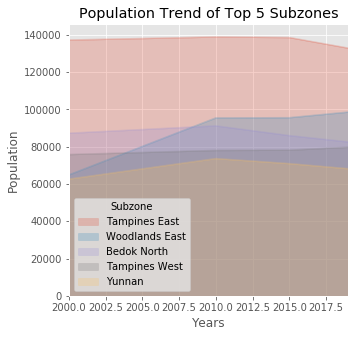

In [48]:
df_top5.index = df_top5.index.map(int) # let's change the index values of df_top5 to type integer for plotting
df_top5.plot(kind='area', 
            alpha=0.25,
             stacked=False,
             figsize=(5, 5), # pass a tuple (x, y) size
             )

plt.title('Population Trend of Top 5 Subzones')
plt.ylabel('Population')
plt.xlabel('Years')

plt.show()

# 1
address = 'Ang Mo Kio, SG'

geolocator = Nominatim(user_agent="sg_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geographical coordinate of Ang Mo Kio are {}. {}.'.format(latitude, longitude))